In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_path(alphas, coefs, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    ax.set_xlabel('alpha')
    ax.set_ylabel('weights')

# part 0: setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# reproducible results
np.random.seed(0)

# X is a 10x10 normal
X = np.random.normal(size=(10, 10))
y = np.random.normal(size=10)
# X = np.random.normal(scale=1 / np.arange(1, 11), size=(10, 10))
# y = np.ones(10)

# alphas to be used the paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

# part 1: standard Ridge example

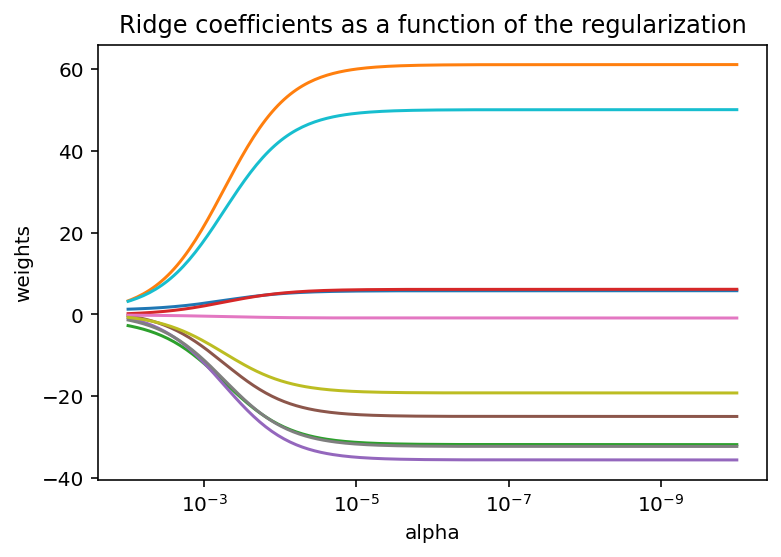

In [4]:
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

plot_path(alphas, coefs)
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# part 2: Ridge, by using elastic nets

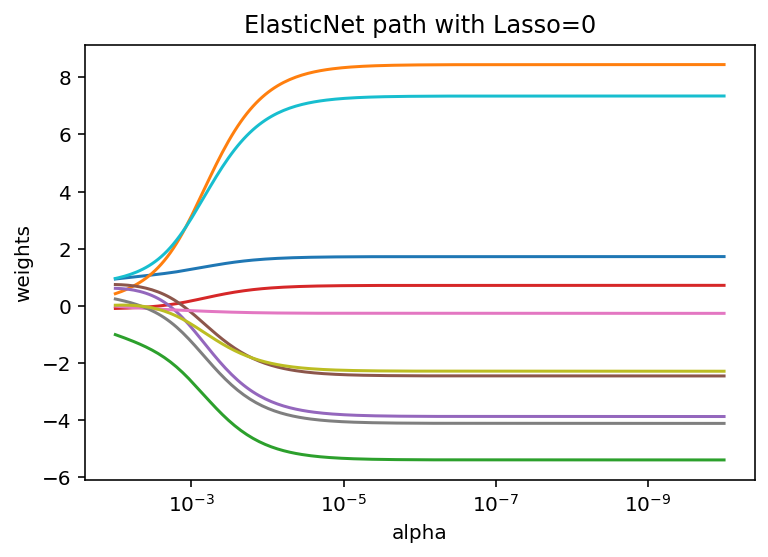

In [5]:
import warnings
from sklearn.linear_model import ElasticNet

coefs = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for a in alphas:
        eln = ElasticNet(alpha=a, l1_ratio=0, fit_intercept=False)
        eln.fit(X, y)
        coefs.append(eln.coef_)

    
plot_path(alphas, coefs)
plt.title('ElasticNet path with Lasso=0')
plt.axis('tight')
plt.show()

# part 2: Non-Negative Ridge, using elastic nets

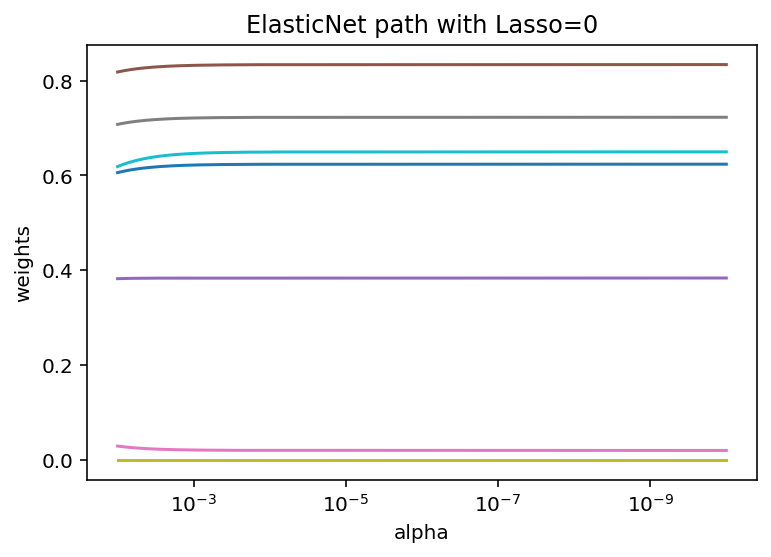

In [6]:
coefs = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for a in alphas:
        eln = ElasticNet(alpha=a, l1_ratio=0, normalize=True, fit_intercept=False, positive=True)
        eln.fit(X, y)
        coefs.append(eln.coef_)

    
plot_path(alphas, coefs)
plt.title('ElasticNet path with Lasso=0')
plt.axis('tight')
plt.show()

# part 3: Non-Negative Ridge, using NNLS

In [7]:
from scipy.optimize import nnls

def nn_ridge(alpha, X, y):
    """return non-negative Ridge coefficients"""
    A = X.T @ X + alpha * np.eye(X.shape[0])
    b = X.T @ y
    coefs, o = nnls(A, b)
    return coefs, o

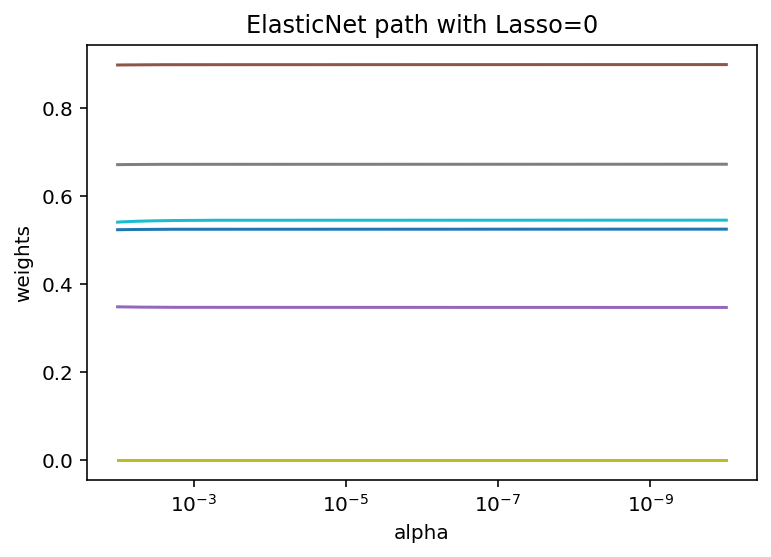

In [8]:
olst = []
coefs = []
for a in alphas:
    c, o = nn_ridge(alpha=a, X=X, y=y)
    coefs.append(c)
    olst.append(o)
plot_path(alphas, coefs)
plt.title('ElasticNet path with Lasso=0')
plt.axis('tight')
plt.show()